Success rate: 0.5805
Final Q-Table Values
LEFT DOWN RIGHT UP
[[4.76648587e-01 1.74752426e-02 1.69062250e-02 1.97603802e-02]
 [2.23237709e-03 1.44171838e-05 3.77432614e-04 7.94699586e-01]
 [4.74943222e-01 1.64126825e-03 1.74145949e-03 3.17691014e-03]
 [1.51924951e-03 2.46900451e-04 2.43538368e-05 1.60341607e-03]
 [2.46500229e-01 2.98062370e-04 1.43427519e-03 1.78464399e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.01156734e-03 9.71354008e-07 4.98852742e-04 4.95195243e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.61987887e-04 0.00000000e+00 0.00000000e+00 5.04235076e-02]
 [0.00000000e+00 6.37194626e-03 8.21912043e-04 2.62039871e-03]
 [1.06606173e-03 1.87410443e-01 4.29605345e-04 2.04211167e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.40473849e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.82750729e-01 9.86816917

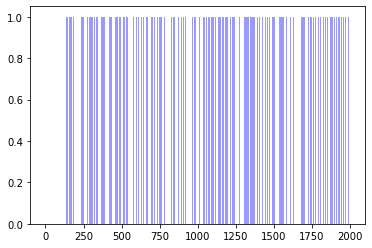

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': True}
)

#env = gym.make('FrozenLake-v3')
env = gym.make('FrozenLake-v0')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
learning_rate = .85
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = (1-learning_rate) * Q[state, action] \
            + learning_rate*(reward + dis * np.max(Q[new_state, :]))

        rAll += reward
        state = new_state

    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
#plt.bar(range(len(rList)), rList, color="blue")
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()